In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def generate_data(sample_size=90, n_class=3):
    x = (np.random.normal(size=(sample_size // n_class, n_class))
         + np.linspace(-3., 3., n_class)).flatten()
    y = np.broadcast_to(np.arange(n_class),
                        (sample_size // n_class, n_class)).flatten()
    return x, y

In [3]:
def get_K(x1,x2, h):
    return np.exp(-(np.linalg.norm(x1 - x2, ord=2) ** 2)/(2* (h ** 2)))

def K_matrix(x, y, h):
    return np.array([get_K(i,j,h) for i in x for j in y]).reshape(len(x),len(y))

In [4]:
def calc_params(x, y, h, n_class):
    theta = np.empty([len(y), n_class])
    K = K_matrix(x[:, None], x[:, None], h)
    pi = np.empty([len(y), n_class])
    for k in range(n_class):
        pi[:, k] = np.array(y == k, dtype=np.float64)
    theta = np.linalg.solve(np.dot(K.T, K) + _lambda * np.eye(len(x)), np.dot(K.T, pi))
        
    return theta

In [5]:
def calc_prob(new_x, x, theta, n_class, h):
    prob = np.dot(K_matrix(new_x[:, None], x[:, None], h), theta)
    prob[prob < np.zeros(prob.shape)] = 0
    prob = prob/np.tile(prob.sum(axis = 1)[:, None], n_class)
    return prob

In [6]:
def visualize(x, y, new_x, prob):

    plt.clf()
    plt.xlim(-5, 5)
    plt.ylim(-.3, 1.8)

    plt.plot(new_x, prob[:, 0], c='blue')
    plt.plot(new_x, prob[:, 1], c='red')
    plt.plot(new_x, prob[:, 2], c='green')

    plt.scatter(x[y == 0], -.1 * np.ones(len(x) // 3), c='blue', marker='o')
    plt.scatter(x[y == 1], -.2 * np.ones(len(x) // 3), c='red', marker='x')
    plt.scatter(x[y == 2], -.1 * np.ones(len(x) // 3), c='green', marker='v')

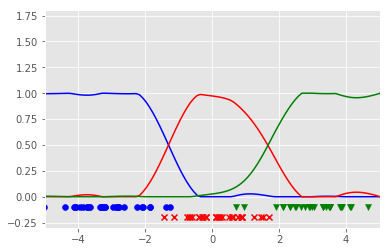

In [7]:
np.random.seed(1)
_lambda = 0.5
h =1.
n_class = 3

x, y = generate_data(sample_size=90, n_class=3)
theta = calc_params(x, y, h, n_class)
prob = calc_prob(np.linspace(-5, 5, 100), x, theta, n_class, h)
visualize(x, y, np.linspace(-5, 5, 100), prob)